<a href="https://colab.research.google.com/github/SohZongXian/DMC-2021/blob/DenisCode/DMC_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import csv


In [3]:
transaction = pd.read_csv("transactions.csv", delimiter="|")
items = pd.read_csv("items.csv", delimiter="|")
evaluation = pd.read_csv("evaluation.csv", delimiter="|")


In [4]:
transaction.head()



,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [5]:
items.head()


,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"


In [6]:
print(transaction.shape)
print(items.shape)
print(evaluation.shape)


(365143, 5)
(78030, 6)
(1000, 1)


In [7]:
data = pd.merge(transaction, items, on=["itemID"])

data.shape


(365143, 10)

In [8]:
data.dtypes


sessionID      int64
itemID         int64
click          int64
basket         int64
order          int64
title         object
author        object
publisher     object
main topic    object
subtopics     object
dtype: object

In [9]:
# choosing Target variable
#print(inner_merged_total['basket'].value_counts())
#print(inner_merged_total['click'].value_counts())
print(data['order'].value_counts())


0     348237
1      16593
2        255
3         18
4          7
5          7
21         4
10         2
25         2
7          2
27         2
12         2
11         2
6          1
28         1
14         1
15         1
19         1
20         1
22         1
23         1
26         1
13         1
Name: order, dtype: int64


In [10]:
##data preprocessing 
##generate target variable interest
data["Interest"] = data["click"] + data["basket"]+ data["order"]

## dropping season ID input for dr raheem
del data["sessionID"]

## aggregrate (idea is to generate the frequencies of item id, and multiply it by interest, getting the total interest of the items)

# **Group by item ID, and then count the item ID, and then interest * count of itemID = total interest column**


In [11]:

##generate frequency
test = data.value_counts(['itemID']).reset_index(name='Frequency')
print(test)


       itemID  Frequency
0       58522       2291
1       66247       1775
2       10666       1749
3       44220       1687
4       69185       1290
...       ...        ...
24904   18624          1
24905   38565          1
24906   61941          1
24907   18650          1
24908   72640          1

[24909 rows x 2 columns]


In [12]:
#Merging frequency 
book_data = pd.merge(data, test, on=["itemID"])
book_data.head()


,itemID,click,basket,order,title,author,publisher,main topic,subtopics,Interest,Frequency
0,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],1,3
1,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],1,3
2,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],1,3
3,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",1,59
4,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",1,59


In [13]:
#remove dupicate rows 
print(book_data.shape)
#book_data.drop_duplicates(subset ="itemID", keep = False,inplace=True) #False is to remove
book_data.drop_duplicates(subset ="itemID", keep= 'first',inplace=True)

print(book_data.shape)

(365143, 11)
(24909, 11)


In [14]:
#Generate total interest

book_data["Total_Interest"] = book_data["Frequency"] * book_data["Interest"] 


In [15]:
#Print latest book_data

book_data 


,itemID,click,basket,order,title,author,publisher,main topic,subtopics,Interest,Frequency,Total_Interest
0,21310,1,0,0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],1,3,3
3,73018,1,0,0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",1,59,59
62,19194,1,0,0,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",1,186,186
248,40250,1,0,0,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",1,339,339
587,46107,1,0,0,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",1,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...
365138,21264,1,0,0,Soon,Morris Gleitzman,Penguin Random House Children's UK,YFN,[5AL],1,1,1
365139,22297,1,0,0,Warum? Fragen u. Antworten f. Kleinkinder - In...,NaN,Yo Yo Books,YBC,[YBL],1,1,1
365140,56041,1,0,0,Tesla,Mark Lingane,Insync Holdings Pty Ltd,FLM,[],1,1,1
365141,67832,2,0,0,Hexenherz. Glühender Hass,Monika Loerchner,Acabus Verlag,FMH,"[1D,FMH,FMR]",2,1,2


# **Explanatory Data Analysis**


In [16]:
book_data.dtypes


itemID             int64
click              int64
basket             int64
order              int64
title             object
author            object
publisher         object
main topic        object
subtopics         object
Interest           int64
Frequency          int64
Total_Interest     int64
dtype: object

In [17]:
#Count total number for frequency and Total Interest
print(book_data['Total_Interest'].value_counts())


1       6781
2       3569
3       2006
4       1614
6       1053
        ... 
1687       1
983        1
727        1
599        1
3870       1
Name: Total_Interest, Length: 456, dtype: int64


In [18]:
print(book_data['click'].value_counts())


1     20601
2      1573
0      1439
3       668
4       216
5       182
6        86
7        64
9        24
8        20
11       10
10        9
13        7
12        2
16        2
17        1
15        1
21        1
14        1
23        1
22        1
Name: click, dtype: int64


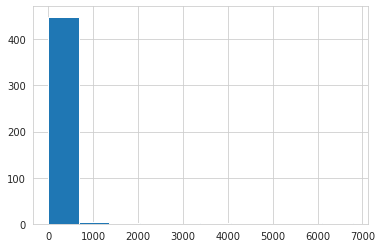

In [24]:
#Create histogram 

x = book_data['Total_Interest'].value_counts()

plt.hist(x)
plt.show()


In [25]:
#Check if there is any missing data
book_data.isnull().sum()

itemID               0
click                0
basket               0
order                0
title                0
author            2017
publisher            1
main topic         128
subtopics            0
Interest             0
Frequency            0
Total_Interest       0
dtype: int64

Text(0, 0.5, 'Total Interest')

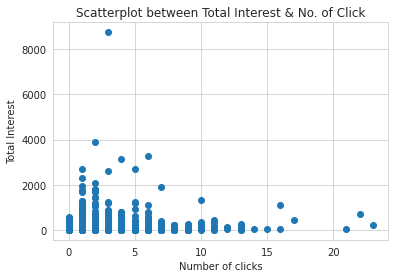

In [26]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(book_data['click'], book_data['Total_Interest'])

# set a title and labels
ax.set_title('Scatterplot between Total Interest & No. of Click')
ax.set_xlabel('Number of clicks')
ax.set_ylabel('Total Interest')